In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style = 'darkgrid')
%matplotlib inline 

In [2]:
desc = pd.read_csv('VariableDescription.csv')
desc

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."
5,Building_Fenced,"is the building fence or not (N-Fenced, V-Not ..."
6,Garden,building has garden or not (V-has garden; O-no...
7,Settlement,Area where the building is located. (R- rural ...
8,Building Dimension,Size of the insured building in m2
9,Building_Type,"The type of building (Type 1, 2, 3, 4)"


In [3]:
data = pd.read_csv('train_data.csv')
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [4]:
data.shape

(7160, 14)

In [5]:
data.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

In [6]:
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

# EXPLORATARY DATA ANALYSIS

# customer 

In [7]:
data['Customer Id'].nunique()

7160

# YearOfObservation

In [8]:
data['YearOfObservation'].nunique()

5

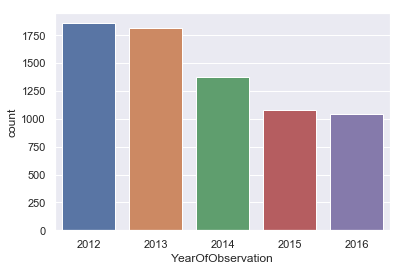

In [9]:
sns.countplot('YearOfObservation', data = data)

# Insured_Period 

In [10]:
data['Insured_Period'].nunique()

401

# Residential 

In [11]:
data['Residential'].nunique()

2

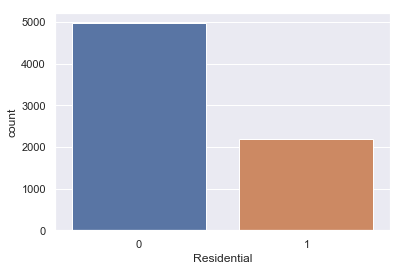

In [12]:
sns.countplot('Residential', data = data)

In [13]:
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

# Building_Painted

In [14]:
data.Building_Painted.nunique()

2

In [15]:
data.Building_Painted.unique()

array(['N', 'V'], dtype=object)

In [16]:
data.Building_Painted = data.Building_Painted.replace({'N': 1, 'V' : 0})

data.Building_Painted.unique()

array([1, 0], dtype=int64)

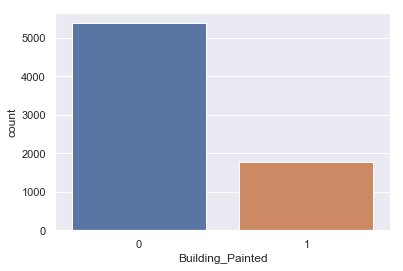

In [17]:
sns.countplot('Building_Painted', data = data)

# Building_Fenced

In [18]:
data.Building_Fenced.unique()

array(['V', 'N'], dtype=object)

In [19]:
data.Building_Fenced = data.Building_Fenced.replace({'N': 1, 'V' : 0}) 

data.Building_Fenced.unique()

array([0, 1], dtype=int64)

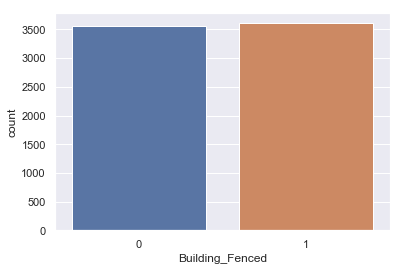

In [20]:
sns.countplot('Building_Fenced', data = data)

# Garden

In [21]:
data.Garden.unique()

array(['V', 'O', nan], dtype=object)

In [22]:
data.Garden.isnull().sum()

7

In [23]:
data.Garden = data.Garden.replace({'V': 1, 'O': 0})

data.Garden.unique()

array([ 1.,  0., nan])

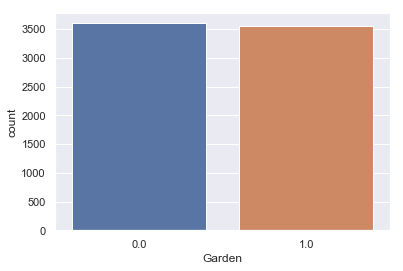

In [24]:
sns.countplot('Garden', data = data)

In [25]:
data.Garden = data.Garden.fillna(method = 'ffill')
data.Garden.unique()

array([1., 0.])

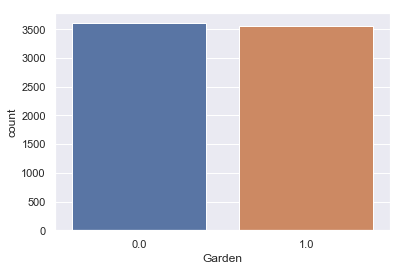

In [26]:
sns.countplot('Garden', data = data)

In [27]:

data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                float64
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [28]:
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,0,1,0.0,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,1,0,1.0,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,0,0,1.0,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,0,1,0.0,R,680.0,1,1800.0,3,1053,0


# Settlement

In [29]:
data.Settlement.nunique()

2

In [30]:
data.Settlement.unique()

array(['U', 'R'], dtype=object)

In [31]:
data.Settlement = data.Settlement.replace({'U' : 1, 'R' : 0})
data.Settlement.unique()

array([1, 0], dtype=int64)

# Building Dimension

In [32]:
data['Building Dimension'].isnull().sum()

106

In [33]:
data['Building Dimension'].nunique()

2043

In [34]:
data['Building Dimension'] = data['Building Dimension'].fillna(method = 'ffill')
data['Building Dimension'].nunique()

2043

In [35]:
data['Building Dimension'].isnull().sum()

0

# Building_Type

In [36]:
data.Building_Type.nunique()

4

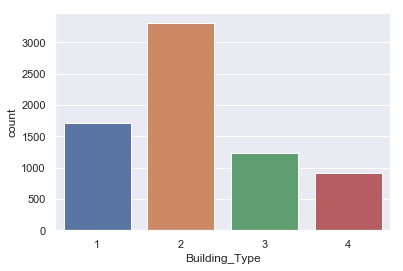

In [37]:
sns.countplot('Building_Type', data = data)

In [38]:
data.dtypes


Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
Claim                   int64
dtype: object

In [39]:
data.Date_of_Occupancy.isnull().sum()

508

In [40]:
data.Date_of_Occupancy.value_counts().iloc[:20]

1960.0    1818
1980.0    1155
1988.0     530
1900.0     371
1970.0     285
1950.0     245
1930.0     167
1920.0     100
1990.0      98
2011.0      97
2009.0      89
2008.0      74
2010.0      65
2012.0      62
2007.0      58
1940.0      53
1965.0      52
2000.0      52
1975.0      52
1850.0      49
Name: Date_of_Occupancy, dtype: int64

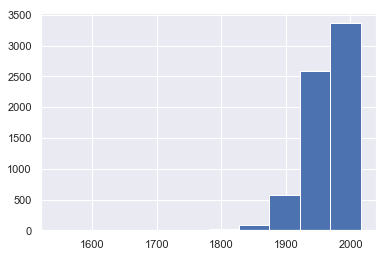

In [41]:
data.Date_of_Occupancy.hist()

In [42]:
data['Date_of_Occupancy'] = data.Date_of_Occupancy.fillna(method = 'ffill')
data.Date_of_Occupancy.isnull().sum()

0

# NumberOfWindows

In [43]:
data.NumberOfWindows.nunique()

11

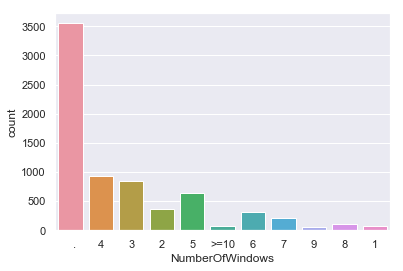

In [44]:
sns.countplot('NumberOfWindows', data = data)

In [ ]:
data.NumberOfWindows.hist()

In [46]:
data.NumberOfWindows.unique()

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [47]:
data.NumberOfWindows = data.NumberOfWindows.replace({'   .' : '0', '>=10' : '10'})
data.NumberOfWindows.unique()

array(['0', '4', '3', '2', '5', '10', '6', '7', '9', '8', '1'],
      dtype=object)

In [48]:
data.NumberOfWindows = data.NumberOfWindows.astype(int)

In [49]:
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code               object
Claim                   int64
dtype: object

# Geo_Code

In [50]:
data.Geo_Code.isnull().sum()

102

In [51]:
data.Geo_Code.nunique()

1307

In [52]:
data.Geo_Code = data.Geo_Code.fillna(method = 'ffill')
data.Geo_Code.isnull().sum()

0

In [53]:
code = data.Geo_Code.unique()
code

array(['1053', '1143', '1160', ..., '2B050', '2B096', '2B353'],
      dtype=object)

In [54]:
data.Geo_Code.iloc[:20]

0     1053
1     1053
2     1053
3     1053
4     1053
5     1143
6     1143
7     1160
8     1173
9     1224
10    1283
11    1283
12    1305
13    1305
14    1363
15    1419
16    1419
17    1419
18    2059
19    2059
Name: Geo_Code, dtype: object

In [56]:
new_code = np.arange(1308)[1:]
code_dict = dict(zip(code, new_code))


In [57]:
g = data.Geo_Code.map(code_dict)
len(g)

7160

In [58]:
data.Geo_Code = g
data.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,1,0,1.0,1,290.0,1,1960.0,0,1,0
1,H2037,2015,1.0,0,0,1,0.0,0,490.0,1,1850.0,4,1,0
2,H3802,2014,1.0,0,1,0,1.0,1,595.0,1,1960.0,0,1,0
3,H3834,2013,1.0,0,0,0,1.0,1,2840.0,1,1960.0,0,1,0
4,H5053,2014,1.0,0,0,1,0.0,0,680.0,1,1800.0,3,1,0


In [59]:
data.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int64
Building_Fenced         int64
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code                int64
Claim                   int64
dtype: object

In [60]:
data.shape

(7160, 14)

# Correlation between features

In [61]:
corr = data.corr()
corr.shape

(13, 13)

In [62]:
corr.style.background_gradient()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
YearOfObservation,1,0.0254341,-0.0403913,-0.0568809,0.120373,-0.120642,-0.120103,0.0072887,0.00548978,-0.0267363,0.102345,-0.00347778,-0.0163667
Insured_Period,0.0254341,1,-0.0376201,0.037077,0.0470912,-0.0468807,-0.0465037,0.00690222,-0.0178105,-0.000149071,0.0425851,0.00302254,0.0887145
Residential,-0.0403913,-0.0376201,1,0.0329273,0.0824481,-0.0828183,-0.0826845,0.0577269,0.334039,-0.0652933,0.128818,0.275445,0.063509
Building_Painted,-0.0568809,0.037077,0.0329273,1,-0.574757,0.574434,0.575081,-0.0951869,0.0485408,0.0800866,-0.492943,-0.0257467,-0.0298568
Building_Fenced,0.120373,0.0470912,0.0824481,-0.574757,1,-0.998883,-0.999441,0.125927,0.0204302,-0.143574,0.85915,0.0287046,0.0516571
Garden,-0.120642,-0.0468807,-0.0828183,0.574434,-0.998883,1,0.998883,-0.125728,-0.0214316,0.143629,-0.85952,-0.0281758,-0.0526262
Settlement,-0.120103,-0.0465037,-0.0826845,0.575081,-0.999441,0.998883,1,-0.125853,-0.0203198,0.143442,-0.859778,-0.0290188,-0.0520191
Building Dimension,0.0072887,0.00690222,0.0577269,-0.0951869,0.125927,-0.125728,-0.125853,1,0.00656896,0.201635,0.278815,0.0105886,0.294419
Building_Type,0.00548978,-0.0178105,0.334039,0.0485408,0.0204302,-0.0214316,-0.0203198,0.00656896,1,-0.161184,0.113084,0.100736,0.112168
Date_of_Occupancy,-0.0267363,-0.000149071,-0.0652933,0.0800866,-0.143574,0.143629,0.143442,0.201635,-0.161184,1,-0.132005,0.00402513,0.0142233


In [63]:
corr.style.background_gradient(cmap='Spectral')

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
YearOfObservation,1,0.0254341,-0.0403913,-0.0568809,0.120373,-0.120642,-0.120103,0.0072887,0.00548978,-0.0267363,0.102345,-0.00347778,-0.0163667
Insured_Period,0.0254341,1,-0.0376201,0.037077,0.0470912,-0.0468807,-0.0465037,0.00690222,-0.0178105,-0.000149071,0.0425851,0.00302254,0.0887145
Residential,-0.0403913,-0.0376201,1,0.0329273,0.0824481,-0.0828183,-0.0826845,0.0577269,0.334039,-0.0652933,0.128818,0.275445,0.063509
Building_Painted,-0.0568809,0.037077,0.0329273,1,-0.574757,0.574434,0.575081,-0.0951869,0.0485408,0.0800866,-0.492943,-0.0257467,-0.0298568
Building_Fenced,0.120373,0.0470912,0.0824481,-0.574757,1,-0.998883,-0.999441,0.125927,0.0204302,-0.143574,0.85915,0.0287046,0.0516571
Garden,-0.120642,-0.0468807,-0.0828183,0.574434,-0.998883,1,0.998883,-0.125728,-0.0214316,0.143629,-0.85952,-0.0281758,-0.0526262
Settlement,-0.120103,-0.0465037,-0.0826845,0.575081,-0.999441,0.998883,1,-0.125853,-0.0203198,0.143442,-0.859778,-0.0290188,-0.0520191
Building Dimension,0.0072887,0.00690222,0.0577269,-0.0951869,0.125927,-0.125728,-0.125853,1,0.00656896,0.201635,0.278815,0.0105886,0.294419
Building_Type,0.00548978,-0.0178105,0.334039,0.0485408,0.0204302,-0.0214316,-0.0203198,0.00656896,1,-0.161184,0.113084,0.100736,0.112168
Date_of_Occupancy,-0.0267363,-0.000149071,-0.0652933,0.0800866,-0.143574,0.143629,0.143442,0.201635,-0.161184,1,-0.132005,0.00402513,0.0142233


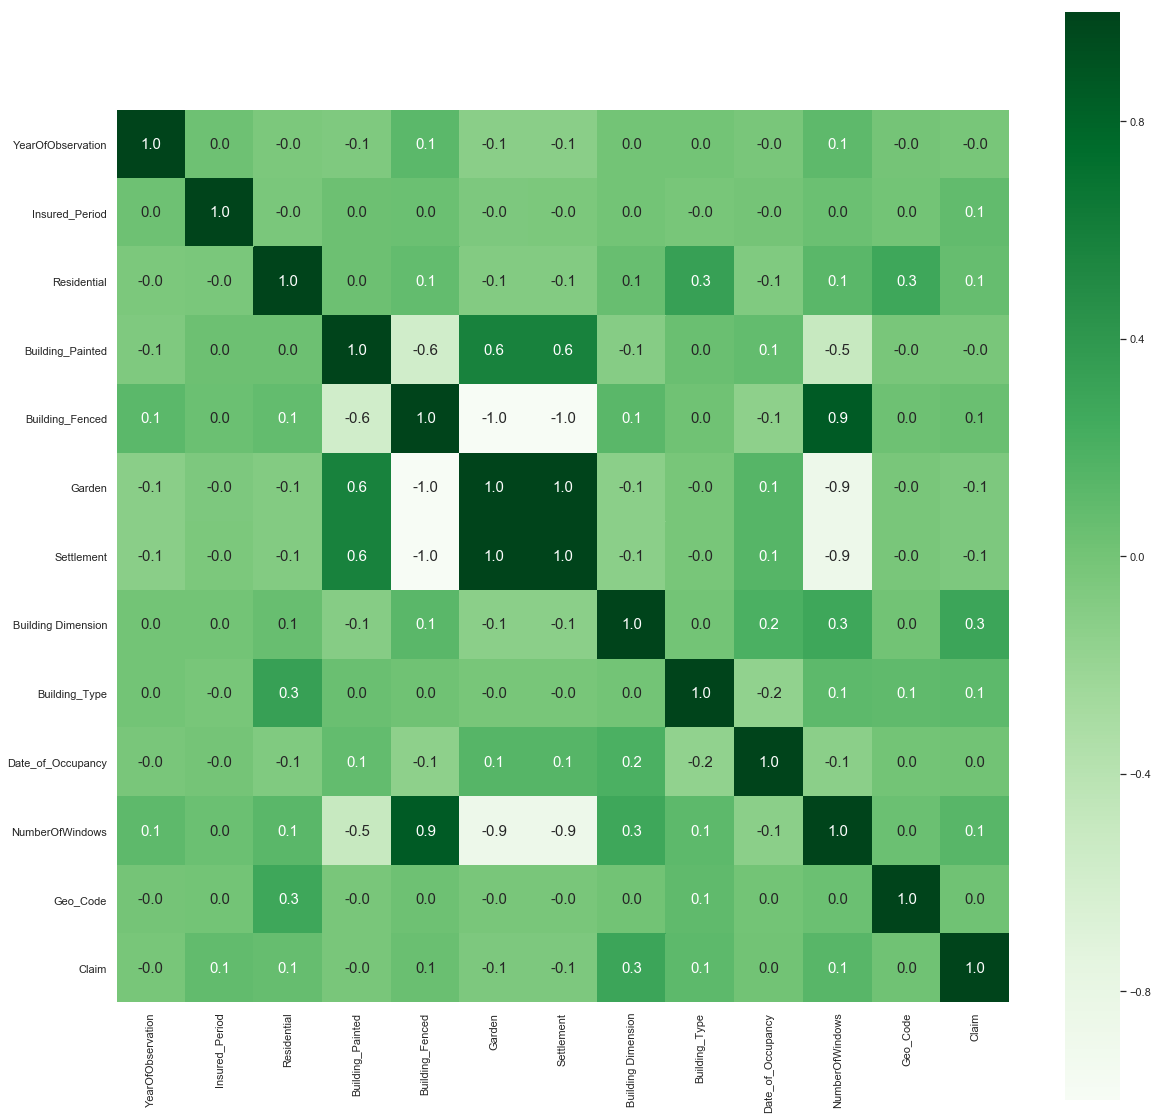

In [64]:
plt.figure(figsize = [20, 20])
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [65]:
X = data.drop(['Claim'], axis = 1)
X = X.drop(['Building_Painted'], axis = 1)
X = X.drop(['Garden'], axis = 1)
X = X.drop(['Settlement'], axis = 1)
X = X.drop(['YearOfObservation'], axis = 1)

In [66]:

y = data['Claim']
print(X.shape)
print (y.shape)

(7160, 9)
(7160,)


In [67]:
X.columns

Index(['Customer Id', 'Insured_Period', 'Residential', 'Building_Fenced',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [68]:
X.dtypes

Customer Id            object
Insured_Period        float64
Residential             int64
Building_Fenced         int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code                int64
dtype: object

In [69]:
X.head()

,Customer Id,Insured_Period,Residential,Building_Fenced,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H14663,1.0,0,0,290.0,1,1960.0,0,1
1,H2037,1.0,0,1,490.0,1,1850.0,4,1
2,H3802,1.0,0,0,595.0,1,1960.0,0,1
3,H3834,1.0,0,0,2840.0,1,1960.0,0,1
4,H5053,1.0,0,1,680.0,1,1800.0,3,1


In [70]:
X.isnull().sum()

Customer Id           0
Insured_Period        0
Residential           0
Building_Fenced       0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [71]:
X = X.drop(['Customer Id'], axis = 1)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Support Vector Machine

In [73]:
from sklearn.svm import SVC

In [74]:
svc = SVC(kernel = 'rbf', class_weight = 'balanced')

In [75]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [1, 5, 10, 50], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svc, param_grid)

grid.fit(X_train, y_train)

print(grid.best_params_)

C:\Users\damia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 10, 'gamma': 0.005}


In [76]:
model = grid.best_estimator_
y_pred = model.predict(X_test)

In [77]:
#Model Evaluation 
from sklearn import metrics 

metrics.accuracy_score(y_test, y_pred)

0.707169459962756

## Using more features 

In [78]:
X2 = data.drop(['Claim'], axis = 1)
X2 = X2.drop(['Customer Id'], axis = 1)

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state = 4)


In [79]:
param_grid = {'C' : [1, 5, 10, 50, 75, 100], 'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(svc, param_grid)

grid.fit(X2_train, y_train)

print(grid.best_params_)

C:\Users\damia\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'C': 75, 'gamma': 0.005}


In [80]:
model = grid.best_estimator_
y2_pred = model.predict(X2_test)

In [81]:
metrics.accuracy_score(y_test, y2_pred)

0.7169459962756052

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)


In [83]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [84]:
ypred = rfc.predict(X_test)

In [85]:
metrics.accuracy_score(y_test, ypred)

0.7616387337057728

## Using Additional features 

In [86]:
X2.shape

(7160, 12)

In [87]:
rfc.fit(X2_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [88]:
y2pred = rfc.predict(X2_test)

In [89]:
metrics.accuracy_score(y_test, y2pred)

0.7825884543761639

# Predicting test sample 

In [90]:
sample = pd.read_csv('sample_submission (1).csv')
sample.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


In [91]:
test = pd.read_csv('test_data.csv')
test.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [92]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced        object
Garden                 object
Settlement             object
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object

In [93]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [94]:
#Building painted

test.Building_Painted.unique()

array(['V', 'N'], dtype=object)

In [95]:
test.Building_Painted = test.Building_Painted.astype(str)
test.Building_Painted[test.Building_Painted == 'N'] = 1
test.Building_Painted[test.Building_Painted == 'V'] = 0


C:\Users\damia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\damia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [96]:
test.Building_Fenced = test.Building_Fenced.astype(str)
test.Garden = test.Garden.astype(str)
test.Settlement = test.Settlement.astype(str)
test['Building_Fenced'] = test['Building_Fenced'].replace({'N':1, 'V':0})
test['Garden'] = test['Garden'].replace({'V':1, 'O':0})
test['Settlement'] = test['Settlement'].replace({'U':1, 'R':0})

In [97]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted       object
Building_Fenced         int64
Garden                 object
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object

In [98]:
test.Building_Fenced = test.Building_Fenced.astype(int)
test.Garden = test.Garden.astype(float)
test.Building_Painted = test.Building_Painted.astype(int)

In [99]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows        object
Geo_Code               object
dtype: object

In [100]:
test.NumberOfWindows.unique()

array(['3', '   .', '2', '4', '9', '5', '6', '8', '>=10', '7', '1'],
      dtype=object)

In [101]:
test.NumberOfWindows = test.NumberOfWindows.replace({'   .': '0', '>=10': '10'})

In [102]:
test.NumberOfWindows = test.NumberOfWindows.astype(int)

In [103]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code               object
dtype: object

In [104]:
g_code = test.Geo_Code.unique()

In [105]:
len(g_code)

698

In [106]:
test.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [107]:
g2_code = np.arange(699)[1:]
code_dict = dict(zip(g_code, g2_code))
test.Geo_Code = test.Geo_Code.map(code_dict)

In [108]:
test.Geo_Code = test.Geo_Code.fillna(method = 'ffill')
test.Garden = test.Garden.fillna(method = 'ffill')
test['Building Dimension'] = test['Building Dimension'].fillna(method ='ffill')
test.Date_of_Occupancy = test.Date_of_Occupancy.fillna(method = 'ffill')
test.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
dtype: int64

In [109]:
test.dtypes

Customer Id            object
YearOfObservation       int64
Insured_Period        float64
Residential             int64
Building_Painted        int32
Building_Fenced         int32
Garden                float64
Settlement              int64
Building Dimension    float64
Building_Type           int64
Date_of_Occupancy     float64
NumberOfWindows         int32
Geo_Code                int64
dtype: object

In [110]:
cust_id = test['Customer Id']
test_X = test.drop(['Customer Id'], axis =1 )
test_X.shape

(3069, 12)

In [111]:
test_pred = rfc.predict(test_X)

In [112]:
answer = pd.DataFrame({'Customer ID': cust_id, 'CLaim' : test_pred})
answer.head()

,Customer ID,CLaim
0,H11920,0
1,H11921,0
2,H9805,0
3,H7493,0
4,H7494,0


In [113]:
answer.CLaim.value_counts()

0    2790
1     279
Name: CLaim, dtype: int64

In [114]:
answer.to_csv('prediction2.csv', index = False)